In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data_dir = '../data/second/'
file_path = '../data/20251111_JUNCTION_training.xlsx'
preds_df = pd.read_csv(data_dir + 'preds_2024-09-29-00_48h.csv',
    sep=";",
    decimal=",",
    parse_dates=["measured_at"],
    date_parser=lambda x: pd.to_datetime(x, utc=True),
)
data = pd.read_excel(file_path, sheet_name='training_consumption')

/tmp/ipykernel_44400/2663927228.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  preds_df = pd.read_csv(data_dir + 'preds_2024-09-29-00_48h.csv',


In [47]:
baseline = pd.read_csv('../data/baseline/validation_48h_baseline.csv',
    sep=";",
    decimal=",",
    parse_dates=["measured_at"],
    date_parser=lambda x: pd.to_datetime(x, utc=True),
)
baseline['measured_at'] = pd.to_datetime(baseline['measured_at'], utc=True)

/tmp/ipykernel_44400/1803695017.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  baseline = pd.read_csv('../data/baseline/validation_48h_baseline.csv',


In [48]:
df = data.copy()
df["measured_at"] = pd.to_datetime(df["measured_at"])

start = pd.Timestamp("2024-09-29 00:00:00", tz='UTC')
end   = start + pd.Timedelta(hours=48)

filtered = df[(df["measured_at"] >= start) & (df["measured_at"] <= end)]

In [49]:
filtered.head()

,measured_at,28,29,30,36,37,38,39,40,41,...,697,698,705,706,707,708,709,738,740,741
32808,2024-09-29 00:00:00+00:00,3.417501,0.124576,0.507429,0.294396,0.108106,0.361632,0.107401,0.112489,0.407465,...,0.083184,0.446332,0.109111,0.314595,0.103658,0.378342,0.096037,0.633064,0.073923,0.486599
32809,2024-09-29 01:00:00+00:00,3.376872,0.118899,0.500973,0.287146,0.106360,0.362895,0.106225,0.109674,0.389508,...,0.079704,0.439656,0.105552,0.300971,0.097643,0.363317,0.095468,0.629322,0.073197,0.483300
32810,2024-09-29 02:00:00+00:00,3.401704,0.119864,0.522388,0.293234,0.114714,0.368762,0.107768,0.109191,0.385862,...,0.086319,0.416428,0.105402,0.297241,0.096618,0.344856,0.095687,0.632322,0.075037,0.511371
32811,2024-09-29 03:00:00+00:00,3.659327,0.128001,0.555739,0.288500,0.124156,0.434860,0.116949,0.112397,0.416734,...,0.095337,0.452521,0.111701,0.311636,0.100188,0.351189,0.098818,0.652478,0.081576,0.508616
32812,2024-09-29 04:00:00+00:00,3.798396,0.151972,0.620531,0.236535,0.149361,0.463632,0.143119,0.128437,0.473831,...,0.105486,0.519747,0.126821,0.345331,0.109858,0.385691,0.110858,0.670193,0.092567,0.584266


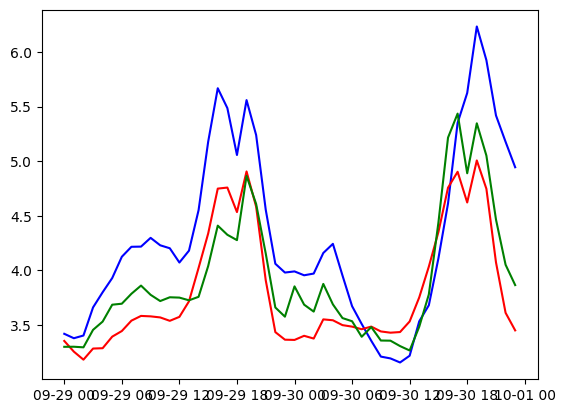

In [50]:
plt.plot(filtered["measured_at"], filtered[28], label="Actual Consumption", color='blue')

plt.plot(preds_df["measured_at"], preds_df['28'], label="Predicted Consumption", color='red')

plt.plot(baseline["measured_at"], baseline['28'], label="Baseline Consumption", color='green')

plt.show()

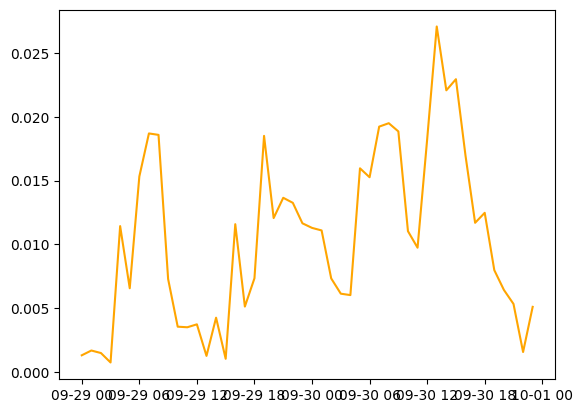

In [58]:
errors = abs(filtered[29].reset_index(drop=True) - preds_df['29'])
plt.plot(filtered["measured_at"], errors, label="Error: Actual - Predicted", color='orange')
plt.show()

In [ ]:
preds_df['28']

0     2.189758
1     2.090263
2     2.074089
3     2.188527
4     2.260959
5     2.437725
6     2.579016
7     2.736688
8     2.843607
9     2.881957
10    2.871884
11    2.871889
12    2.966883
13    3.140913
14    3.296581
15    3.580195
16    3.924805
17    4.060286
18    3.808518
19    4.147251
20    3.716983
21    2.876973
22    2.482982
23    2.300881
24    2.179633
25    2.097683
26    2.082831
27    2.245077
28    2.326466
29    2.421952
30    2.480512
31    2.567912
32    2.633861
33    2.672213
34    2.644888
35    2.687279
36    2.800842
37    2.991538
38    3.183887
39    3.428666
40    3.762463
41    4.001771
42    3.844626
43    4.222293
44    3.858398
45    2.914715
46    2.546738
47    2.349018
Name: 28, dtype: float64

In [55]:
filtered[28]

32808    3.417501
32809    3.376872
32810    3.401704
32811    3.659327
32812    3.798396
32813    3.928906
32814    4.123785
32815    4.215179
32816    4.216804
32817    4.297044
32818    4.228949
32819    4.201721
32820    4.070954
32821    4.179724
32822    4.550929
32823    5.178123
32824    5.668625
32825    5.486504
32826    5.056412
32827    5.559985
32828    5.239241
32829    4.554825
32830    4.059698
32831    3.979015
32832    3.989454
32833    3.953910
32834    3.969734
32835    4.158336
32836    4.242155
32837    3.951830
32838    3.670841
32839    3.507821
32840    3.353279
32841    3.208446
32842    3.191845
32843    3.154596
32844    3.216505
32845    3.531831
32846    3.679196
32847    4.109394
32848    4.611995
32849    5.351200
32850    5.625254
32851    6.234852
32852    5.925762
32853    5.419120
32854    5.177524
32855    4.944352
Name: 28, dtype: float64